In [47]:
import requests
import pandas as pd

In [64]:
LINK = 'https://career.habr.com/api/frontend/vacancies?sort=relevance&type=all&divisions[]=backend&divisions[]=frontend&divisions[]=apps&divisions[]=software&divisions[]=testing&divisions[]=administration&divisions[]=analytics&divisions[]=security&divisions[]=support&divisions[]=other&currency=RUR&page={}'
NUM_OF_PAGES = 130

In [66]:
def get_info_from_page(url, page):
    json_response = requests.get(url.format(page)).json()
    if json_response.get('error'):
        print(json_response.get('error'))
        return None
    return json_response['list']

In [67]:
def sum_info_from_all_pages(url, pages):
    sum_info = []
    for page in range(pages):
        sum_info += get_info_from_page(url, page)
    return sum_info

In [68]:
info = sum_info_from_all_pages(LINK, NUM_OF_PAGES)

In [69]:
# Сохраняем полученную информацию в файл results.json:

df = pd.DataFrame(info)
df.to_json('results.json')

In [72]:
# И работаем с этим файлом:

results = pd.read_json('results.json')

print(results)

              id                   href                         title  \
0     1000089170  /vacancies/1000089170     Разработчик Backend (PHP)   
1     1000085727  /vacancies/1000085727          Developer С# (Cloud)   
2     1000085703  /vacancies/1000085703              Разработчик Java   
3     1000085704  /vacancies/1000085704              Java разработчик   
4     1000085708  /vacancies/1000085708              Разработчик Java   
...          ...                    ...                           ...   
3245  1000087438  /vacancies/1000087438  Middle/Senior .NET Developer   
3246  1000083768  /vacancies/1000083768         C# developer (Junior)   
3247  1000087434  /vacancies/1000087434    РНР программист (Удаленно)   
3248  1000087432  /vacancies/1000087432            Системный аналитик   
3249  1000087430  /vacancies/1000087430                   Аналитик BI   

      isMarked  remoteWork                                salaryQualification  \
0        False        True  {'title': 'Сре

In [73]:
# Сферы деятельности:

spheres_json = results['divisions']
spheres = []
for sphere in spheres_json:
    for i in range(len(sphere)):
        spheres.append(sphere[i]['title'])
spheres = pd.Series(spheres)

print(spheres.value_counts())

Бэкенд                         954
Разработка ПО                  562
Фронтенд                       435
Аналитика                      403
Тестирование                   302
Администрирование              231
Приложения                     223
Поддержка                       56
Информационная безопасность     44
Другое                          42
dtype: int64


<AxesSubplot:title={'center':'Сферы деятельности'}>

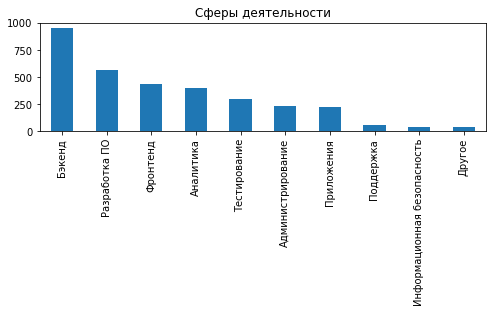

In [74]:
spheres.value_counts().plot(kind='bar',
                            figsize=(8, 2), 
                            title='Сферы деятельности')

In [75]:
# Скиллы:

skills_json = results['skills']
skills = []
for skill in skills_json:
    for i in range(len(skill)):
        skills.append(skill[i]['title'])
skills = pd.Series(skills)

print(skills.value_counts())

SQL                    666
JavaScript             550
Git                    511
PostgreSQL             457
Python                 437
                      ... 
Postfix                  1
Clojure                  1
Arcgis                   1
NetBackup                1
Повышение конверсии      1
Length: 634, dtype: int64


<AxesSubplot:title={'center':'Скиллы (top-30)'}>

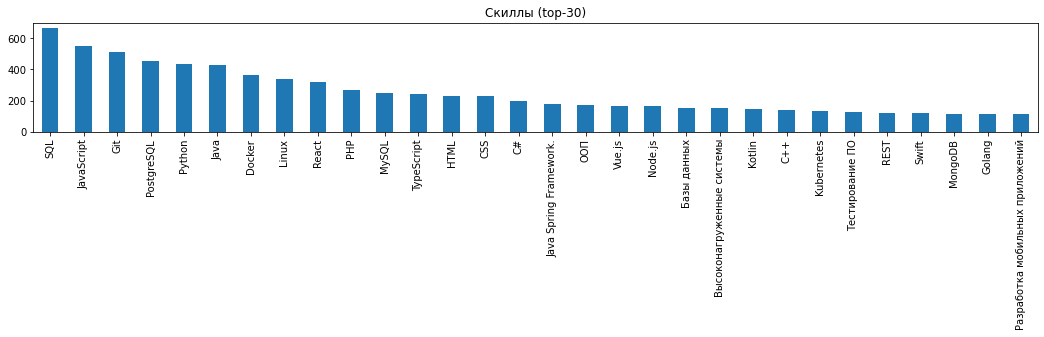

In [76]:
skills.value_counts().head(30).plot(kind='bar',
                               figsize=(18, 2), 
                               title='Скиллы (top-30)')

In [77]:
# Специальности:

titles_json = results['title']
titles = pd.Series(titles_json)
print(titles.value_counts())

Системный аналитик                                                        58
Frontend-разработчик                                                      22
Java Developer                                                            20
QA Engineer                                                               19
DevOps инженер                                                            14
                                                                          ..
Senior/Architect разработчик Java (cистема устойчивых бизнес-операций)     1
Java разработчик (проект "автокредитование")                               1
PHP- программист Bitrix24 (back-end)                                       1
Senior Kotlin Developer (London OR remote)                                 1
Software Development Engineer in Test (KUMA, Python)                       1
Name: title, Length: 2512, dtype: int64


<AxesSubplot:title={'center':'Специальности (top-30)'}>

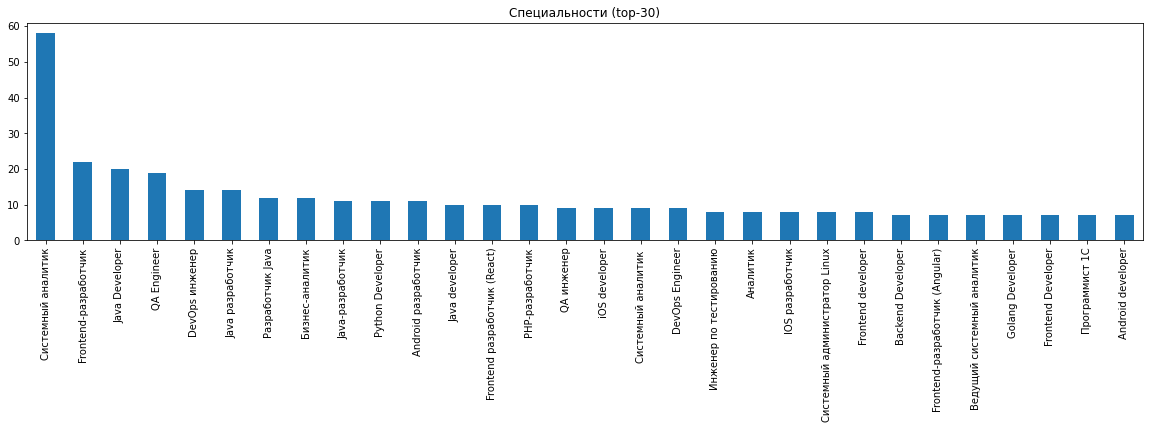

In [78]:
titles.value_counts().head(30).plot(kind='bar',
                                    figsize=(20, 4), 
                                    title='Специальности (top-30)')

In [79]:
# Удалённая работа:

remote_json = results['remoteWork']
remote = pd.Series(remote_json)
remote_rate = round(remote.sum() / remote.count() * 100)

print(f'Удалённая работа: {remote_rate} % ({remote.sum()} вакансий из {remote.count()})\n')

Удалённая работа: 75 % (2439 вакансий из 3250)

